In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data into dataframe
credit_data=pd.read_csv("/content/crx.data",header=None)
print(credit_data.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [ ]:
credit_data.columns=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','ApprovalStatus']
credit_data.head()
credit_data.tail()


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


### Handling Inconsistent Data types and characters

In [ ]:
credit_data.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [ ]:
#credit_data['Age'].astype('int')
#print(credit_data['Age'].dtypes)#conversion error

credit_data['Age']=pd.to_numeric(credit_data['Age'],errors='coerce')
print(credit_data['Age'].dtypes)

float64


In [ ]:
#check for stray characters first.
credit_data['Gender']=credit_data['Gender'].replace('?',np.nan)
credit_data['Gender'].tail(20)

670      b
671      b
672      a
673    NaN
674      a
675      a
676      a
677      b
678      a
679      a
680      b
681      b
682      b
683      b
684      b
685      b
686      a
687      a
688      b
689      b
Name: Gender, dtype: object

In [ ]:
credit_data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


### Handling Missing Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff300f95110>,
      dtype=object)

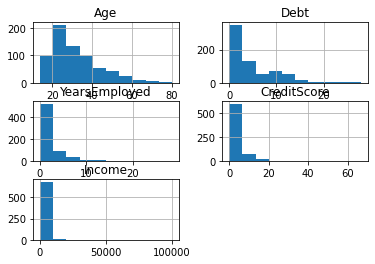

In [ ]:
credit_data.hist()

In [ ]:
#handling missing values for numeric data
credit_data_numeric=credit_data.select_dtypes(include=['int','float'])
numeric_cols=credit_data_numeric.columns.values
print(numeric_cols)

for col in numeric_cols:
  missing=credit_data[col].isnull()
  num_missing=np.sum(missing)

  if num_missing>0:
    m=credit_data[col].median()
    credit_data[col]=credit_data[col].fillna(m)

['Age' 'Debt' 'YearsEmployed' 'CreditScore' 'Income']


In [ ]:
#handling missing values for non-numeric data
credit_data_non_numeric=credit_data.select_dtypes(exclude=['int','float'])
non_numeric_cols=credit_data_non_numeric.columns.values
print(non_numeric_cols)

for col in non_numeric_cols:
  missing=credit_data[col].isnull()
  num_missing=np.sum(missing)
  
  if num_missing>0:
    frequent=credit_data[col].mode().iloc[0] #compute most frequent values from each column and impute the value at index 0 as that would be the most frequent data.
    credit_data[col]=credit_data.fillna(frequent)


['Gender' 'Married' 'BankCustomer' 'EducationLevel' 'Ethnicity'
 'PriorDefault' 'Employed' 'DriversLicense' 'Citizen' 'ZipCode'
 'ApprovalStatus']


### Checking for outliers

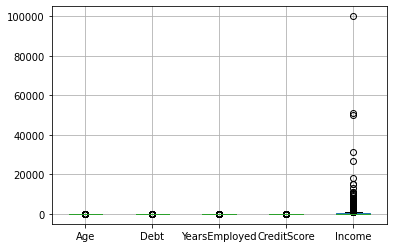

In [ ]:
### checking for outliers.
#As our data is higly skewed there is a possibility that there are outliers in our dataset
credit_data.boxplot()

It looks like Income column has some outliers compared to other columns so we will try to remove these outliers using Standard deviation detection.

In [ ]:
#handling outliers by standard deviation detection
mean=credit_data['Income'].mean()
std=credit_data['Income'].std()
cut_off=std*3
lower,upper=mean-cut_off,mean+cut_off
credit_data=credit_data[(credit_data['Income']<upper) & (credit_data['Income']>lower)]
print(type(credit_data))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
#converting non-numeric to numeric type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for col in credit_data:
    if credit_data[col].dtypes=='object':
        credit_data[col]=enc.fit_transform(credit_data[col])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff300ef5d50>,
      dtype=object)

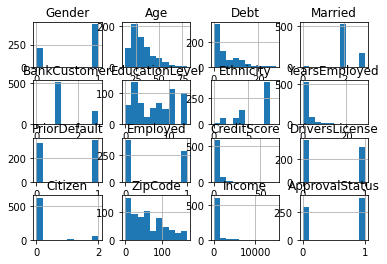

In [ ]:
credit_data.hist()

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

credit_data=credit_data.to_numpy()
X,y = credit_data[:,0:14] , credit_data[:,15]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,stratify=y)

print(X_train)

[[  1.    23.58   1.79 ...   1.     0.    43.  ]
 [  1.    19.42   7.25 ...   0.     0.    31.  ]
 [  1.    39.5    4.25 ...   0.     0.    36.  ]
 ...
 [  1.    39.25   9.5  ...   0.     0.    84.  ]
 [  1.    29.83   3.5  ...   0.     0.    74.  ]
 [  1.    29.42   1.25 ...   1.     0.   128.  ]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_X_train=scale.fit_transform(X_train)
scaled_X_test=scale.transform(X_test) #applying only the transform on test data as test data should not be standarized and seen during training

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#measuring model's performance and predicting on new unseen data
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
#import accuracy score
from sklearn.metrics import accuracy_score


# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(scaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy score of logistic regression classifier: ", accuracy_score(y_test,y_pred))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy score of logistic regression classifier:  0.8495575221238938


array([[ 88,  11],
       [ 23, 104]])

In [ ]:
#fine tuning our model using Grid Search CV
param_grid= {'penalty':['l2'],
            # 'solver':['newton-cg','liblinear','sag','saga'],
             'max_iter':[100,150,200,250,300]
             }

#https://www.youtube.com/watch?v=pooXM9mM7FU

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(logreg,param_grid=param_grid,cv=5)
best_clf=clf.fit(scaled_X_train,y_train)
ypred=clf.predict(scaled_X_test)
print(best_clf.best_estimator_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
print('Accuracy is ',accuracy_score(y_test,ypred))

Accuracy is  0.8495575221238938
